In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('headbrain.csv')

In [3]:
dataset.shape

(237, 4)

In [4]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
X = dataset['Head Size(cm^3)'].values
y = dataset['Brain Weight(grams)'].values

In [6]:
X[:10]

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982],
      dtype=int64)

In [7]:
y[:10]

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375],
      dtype=int64)

In [8]:
import matplotlib.pyplot as plt

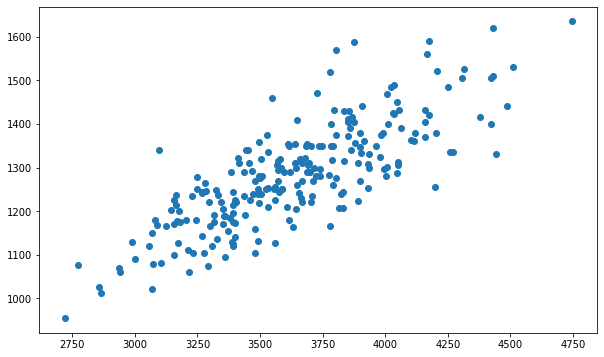

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()

In [10]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [11]:
numer = 0
denom = 0
n = len(X)

for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
slope = numer/denom

In [12]:
slope

0.26342933948939945

In [13]:
intercept = mean_y - slope * mean_x

In [14]:
intercept

325.57342104944223

In [15]:
round(slope,3)

0.263

In [16]:
round(intercept,3)

325.573

In [17]:
predictions = []
for i in range(n):
    y_pred = slope * X[i] + intercept
    predictions.append(int(y_pred))

In [18]:
print("Predicted values")
print(predictions[:10])

Predicted values
[1514, 1310, 1448, 1320, 1425, 1269, 1322, 1263, 1277, 1374]


In [19]:
print("Actual Values")
print(y[:10])

Actual Values
[1530 1297 1335 1282 1590 1300 1400 1255 1355 1375]


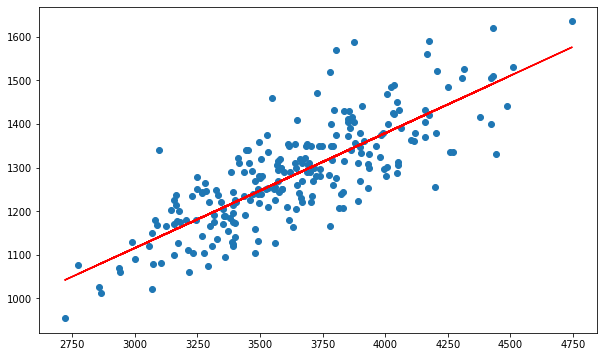

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'red')
plt.show()

In [21]:
error = 0
for i in range(n):
    error += (predictions[i] - y[i]) ** 2

mse = error / n
print("Mean Squared Error :",mse)

Mean Squared Error : 5202.9029535864975


In [22]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Root Mean Squared Error : 72.13115106239812


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
st = StandardScaler()

In [27]:
X = X.reshape(-1,1)
X = st.fit_transform(X)

In [28]:
y = y.reshape(-1,1)
y = st.fit_transform(y)

In [30]:
# X[:10]

In [34]:
def gradientDescent(X,y,epochs,alpha):
    n = len(X)
    slope = 0
    intercept = 0
    for epoch in range(epochs):
        y_pred = slope * X + intercept
        loss = y_pred - y
        gradSlope = (2/n) * loss.T.dot(X)
        slope = slope - alpha * gradSlope
        
        gradIntercept = (2/n) * sum(loss)
        intercept = intercept - alpha * gradIntercept
    return slope, intercept

In [48]:
epochs = 1000
alpha = 0.1
m,c = gradientDescent(X,y,epochs,alpha)

In [49]:
m,c

(array([[0.79956971]]), array([-2.88002158e-16]))

In [50]:
m = m[0][0]
c = c[0]

In [51]:
predictions = []
for i in range(n):
    y_pred = m * X[i] + c
    predictions.append(y_pred)

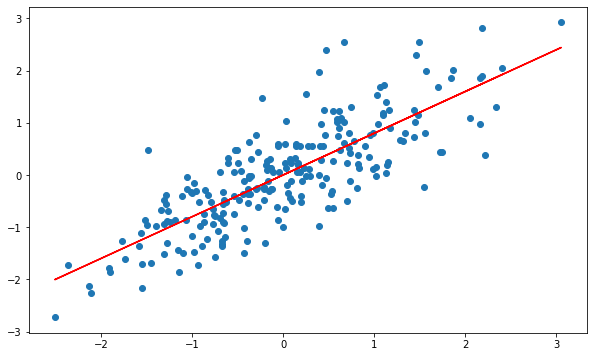

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'red')
plt.show()